<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Project 1 Rubric

### Requirements

1. You need to perform an exhaustive exploration of your dataset.
2. Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
3. You need to define functions (no matter how complicated they are)
4. You don't need to do any modeling

    1. Load and clean, if neccessary, the data with pandas.
    2. Describe the data and investigate any outliers.
    3. Explore relationships between the variables.
    4. Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
    5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. 

5. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

### Data Set Characteristics:

This dataset uses a sample of 34 OECD countries that has details Foreign Direct Investment flow of each pair countries ,over the period 2000-2013.  

1) Dependent Variable: 
 lfdi           FDI flows between countries in logs
2) Independent Variables: 
 lgdph          GDP per capital of host country (in logs)
 lgdpr          GDP per capital of resource country (in logs)	
 lpoph          Population in host country (in logs)
 lpopr          Population in resource country (in logs)
 eduh           education of host country
 edur           education of resource country
 eduhmr         education of host country - eduacation of resource country
 fdiw           FDI flows betweencountry pairs 6 years ago

3) Selection variable:
 fdidi           Dummy variable--whether country pairs had FDI 6 years ago (1-yes, 0-no)


In [429]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [430]:
##read the data
FDI =pd.read_stata('/Users/ChrisH/Desktop/FDI.dta') 

In [431]:
## ONLY CONSIDER THE SITUATION WHEN US AS A HOST COUNTRY(make a mask)
FDI_US = FDI['Host'] == 'US'
FDIUS=FDI[FDI_US]
FDIUS 

,year,Host,resource,lfdi,gdppch,gdppcr,lgdppcr,lgdppch,lpoph,lpopr,eduhmr,fdiw
1122,2000,US,Australia,8.504107,40087.097656,2973.123535,7.997368,10.598810,12.667086,10.054940,1.480000,NaN
1123,2000,US,Austria,NaN,40087.097656,35549.917969,10.478693,10.598810,12.667086,9.046287,3.570000,NaN
1124,2000,US,Belgium,NaN,40087.097656,32717.015625,10.395651,10.598810,12.667086,9.319475,2.270000,NaN
1125,2000,US,Canada,10.213102,40087.097656,32186.294922,10.379296,10.598810,12.667086,10.469670,0.830000,NaN
1126,2000,US,Chile,NaN,40087.097656,1175.898071,7.069788,10.598810,12.667086,9.774280,3.190000,NaN
1127,2000,US,Czech Republic,NaN,40087.097656,19668.759766,9.886786,10.598810,12.667086,9.263437,0.130000,NaN
1128,2000,US,Denmark,NaN,40087.097656,38479.957031,10.557893,10.598810,12.667086,8.634851,1.759999,-5479.0
1129,2000,US,Estonia,NaN,40087.097656,15426.636719,9.643851,10.598810,12.667086,7.185425,1.089999,NaN
1130,2000,US,Finland,8.390949,40087.097656,31848.439453,10.368744,10.598810,12.667086,8.603932,3.349999,NaN
1131,2000,US,France,10.839601,40087.097656,32408.066406,10.386163,10.598810,12.667086,11.064206,2.740000,23743.0


In [432]:
FDIUS.head() ## check whether my code is correct or not

,year,Host,resource,lfdi,gdppch,gdppcr,lgdppcr,lgdppch,lpoph,lpopr,eduhmr,fdiw
1122,2000,US,Australia,8.504107,40087.097656,2973.123535,7.997368,10.59881,12.667086,10.054940,1.48,NaN
1123,2000,US,Austria,NaN,40087.097656,35549.917969,10.478693,10.59881,12.667086,9.046287,3.57,NaN
1124,2000,US,Belgium,NaN,40087.097656,32717.015625,10.395651,10.59881,12.667086,9.319475,2.27,NaN
1125,2000,US,Canada,10.213102,40087.097656,32186.294922,10.379296,10.59881,12.667086,10.469670,0.83,NaN
1126,2000,US,Chile,NaN,40087.097656,1175.898071,7.069788,10.59881,12.667086,9.774280,3.19,NaN


In [433]:
FDIUS.tail()

,year,Host,resource,lfdi,gdppch,gdppcr,lgdppcr,lgdppch,lpoph,lpopr,eduhmr,fdiw
16179,2013,US,Sweden,NaN,49829.914062,42169.644531,10.649456,10.816371,12.667086,9.172041,1.049999,NaN
16180,2013,US,Switzerland,NaN,49829.914062,51826.425781,10.855656,10.816371,12.667086,9.001927,2.309999,NaN
16181,2013,US,Turkey,NaN,49829.914062,17750.388672,9.784163,10.816371,12.667086,11.241426,6.390000,NaN
16182,2013,US,United Kingdom,NaN,49829.914062,37306.125000,10.526913,10.816371,12.667086,11.065946,1.759999,NaN
16183,2013,US,United States,NaN,49829.914062,49829.914062,10.816371,10.816371,12.667086,12.667086,0.000000,NaN


In [434]:
FDIUS.shape ##check the shape of my data frame

(476, 12)

In [435]:
FDIUS.fillna(0) ##replace all the null with value 0

,year,Host,resource,lfdi,gdppch,gdppcr,lgdppcr,lgdppch,lpoph,lpopr,eduhmr,fdiw
1122,2000,US,Australia,8.504107,40087.097656,2973.123535,7.997368,10.598810,12.667086,10.054940,1.480000,0.0
1123,2000,US,Austria,0.000000,40087.097656,35549.917969,10.478693,10.598810,12.667086,9.046287,3.570000,0.0
1124,2000,US,Belgium,0.000000,40087.097656,32717.015625,10.395651,10.598810,12.667086,9.319475,2.270000,0.0
1125,2000,US,Canada,10.213102,40087.097656,32186.294922,10.379296,10.598810,12.667086,10.469670,0.830000,0.0
1126,2000,US,Chile,0.000000,40087.097656,1175.898071,7.069788,10.598810,12.667086,9.774280,3.190000,0.0
1127,2000,US,Czech Republic,0.000000,40087.097656,19668.759766,9.886786,10.598810,12.667086,9.263437,0.130000,0.0
1128,2000,US,Denmark,0.000000,40087.097656,38479.957031,10.557893,10.598810,12.667086,8.634851,1.759999,-5479.0
1129,2000,US,Estonia,0.000000,40087.097656,15426.636719,9.643851,10.598810,12.667086,7.185425,1.089999,0.0
1130,2000,US,Finland,8.390949,40087.097656,31848.439453,10.368744,10.598810,12.667086,8.603932,3.349999,0.0
1131,2000,US,France,10.839601,40087.097656,32408.066406,10.386163,10.598810,12.667086,11.064206,2.740000,23743.0


In [436]:
FDIUS.describe().T 

,count,mean,std,min,25%,50%,75%,max
year,476.0,2006.500000,4.035370,2000.000000,2003.000000,2006.500000,2010.000000,2013.000000
lfdi,268.0,7.583761,2.237666,0.693147,NaN,NaN,NaN,11.322394
gdppch,476.0,39033.800781,15324.296875,47.185989,40478.339844,45431.921875,47334.562500,59369.664062
gdppcr,476.0,29849.335938,14763.062500,47.185989,20802.294434,32009.974609,38993.314453,84548.250000
lgdppcr,476.0,10.057114,0.947633,3.854097,9.942817,10.373803,10.571146,11.345078
lgdppch,476.0,10.064628,1.817632,3.854097,10.608522,10.723970,10.764996,10.991539
lpoph,476.0,12.664392,0.021016,12.391272,12.667086,12.667086,12.667086,12.667086
lpopr,476.0,9.545491,1.521536,5.785031,8.603932,9.287045,10.816709,12.667086
eduhmr,476.0,2.140003,1.418069,0.000000,1.200000,1.759999,2.740000,6.390000
fdiw,266.0,71.672935,14586.016602,-75330.000000,NaN,NaN,NaN,73311.000000


In [437]:
FDIUS.isnull().sum()  

year          0
Host          0
resource      0
lfdi        208
gdppch        0
gdppcr        0
lgdppcr       0
lgdppch       0
lpoph         0
lpopr         0
eduhmr        0
fdiw        210
dtype: int64

In [418]:
 FDIUS.fillna(0) ##replace nan value with 0

,codep,year,Host,codeh,resource,coder,fdi,lfdi,gdph,gdpr,...,popr,gdppch,gdppcr,lgdppcr,lgdppch,lpoph,lpopr,eduhmr,fdiw,fdidi
1122,3401,2000,US,34.0,Australia,1.0,4935.0,8.504107,1.271306e+10,6.918597e+07,...,23270.464844,40087.097656,2973.123535,7.997368,10.598810,12.667086,10.054940,1.480000,0.0,0
1123,3402,2000,US,34.0,Austria,2.0,-161.0,0.000000,1.271306e+10,3.017108e+08,...,8486.961914,40087.097656,35549.917969,10.478693,10.598810,12.667086,9.046287,3.570000,0.0,0
1124,3403,2000,US,34.0,Belgium,3.0,0.0,0.000000,1.271306e+10,3.648969e+08,...,11153.122070,40087.097656,32717.015625,10.395651,10.598810,12.667086,9.319475,2.270000,0.0,0
1125,3404,2000,US,34.0,Canada,4.0,27258.0,10.213102,1.271306e+10,1.133943e+09,...,35230.613281,40087.097656,32186.294922,10.379296,10.598810,12.667086,10.469670,0.830000,0.0,0
1126,3405,2000,US,34.0,Chile,5.0,0.0,0.000000,1.271306e+10,2.066739e+07,...,17575.832031,40087.097656,1175.898071,7.069788,10.598810,12.667086,9.774280,3.190000,0.0,0
1127,3406,2000,US,34.0,Czech Republic,6.0,0.0,0.000000,1.271306e+10,2.074133e+08,...,10545.314453,40087.097656,19668.759766,9.886786,10.598810,12.667086,9.263437,0.130000,0.0,0
1128,3407,2000,US,34.0,Denmark,7.0,-544.0,0.000000,1.271306e+10,2.164225e+08,...,5624.292969,40087.097656,38479.957031,10.557893,10.598810,12.667086,8.634851,1.759999,-5479.0,0
1129,3408,2000,US,34.0,Estonia,8.0,0.0,0.000000,1.271306e+10,2.036393e+07,...,1320.050049,40087.097656,15426.636719,9.643851,10.598810,12.667086,7.185425,1.089999,0.0,0
1130,3409,2000,US,34.0,Finland,9.0,4407.0,8.390949,1.271306e+10,1.736715e+08,...,5453.061035,40087.097656,31848.439453,10.368744,10.598810,12.667086,8.603932,3.349999,0.0,0
1131,3410,2000,US,34.0,France,10.0,51001.0,10.839601,1.271306e+10,2.069078e+09,...,63844.527344,40087.097656,32408.066406,10.386163,10.598810,12.667086,11.064206,2.740000,23743.0,1


In [447]:
FDIUS['fdidi'] = FDIUS['fdiw'].map(lambda x: 1 if x > 0 else 0)  
## Function: generate a new variable 'fdid',which represent the binary situation of FDI flows 6 years ago, 
## fdiw is the value of FDI flow of country pairs 6 years ago. 
## fdidi=1 means country pairs had FDI flows 6 years ago. 

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [413]:
## FDIUS.drop('fdidi', axis=1, inplace=True)

In [438]:
FDIUS ## Check new variable fdidi

,year,Host,resource,lfdi,gdppch,gdppcr,lgdppcr,lgdppch,lpoph,lpopr,eduhmr,fdiw
1122,2000,US,Australia,8.504107,40087.097656,2973.123535,7.997368,10.598810,12.667086,10.054940,1.480000,NaN
1123,2000,US,Austria,NaN,40087.097656,35549.917969,10.478693,10.598810,12.667086,9.046287,3.570000,NaN
1124,2000,US,Belgium,NaN,40087.097656,32717.015625,10.395651,10.598810,12.667086,9.319475,2.270000,NaN
1125,2000,US,Canada,10.213102,40087.097656,32186.294922,10.379296,10.598810,12.667086,10.469670,0.830000,NaN
1126,2000,US,Chile,NaN,40087.097656,1175.898071,7.069788,10.598810,12.667086,9.774280,3.190000,NaN
1127,2000,US,Czech Republic,NaN,40087.097656,19668.759766,9.886786,10.598810,12.667086,9.263437,0.130000,NaN
1128,2000,US,Denmark,NaN,40087.097656,38479.957031,10.557893,10.598810,12.667086,8.634851,1.759999,-5479.0
1129,2000,US,Estonia,NaN,40087.097656,15426.636719,9.643851,10.598810,12.667086,7.185425,1.089999,NaN
1130,2000,US,Finland,8.390949,40087.097656,31848.439453,10.368744,10.598810,12.667086,8.603932,3.349999,NaN
1131,2000,US,France,10.839601,40087.097656,32408.066406,10.386163,10.598810,12.667086,11.064206,2.740000,23743.0


In [439]:
FDIUS.groupby( ['resource'] )[ ['lfdi','lgdppcr'] ].mean()  
##US average lfdi to other resource country and average GPD per capital of resource country from 2000-2013 

,lfdi,lgdppcr
resource,,
Australia,8.411347,10.343646
Austria,5.584111,10.256802
Belgium,8.395722,10.336008
Canada,9.656727,10.185999
Chile,4.235689,9.317595
Czech Republic,2.942589,9.934554
Denmark,6.599131,10.621629
Estonia,NaN,9.950333
Finland,6.087060,10.334373


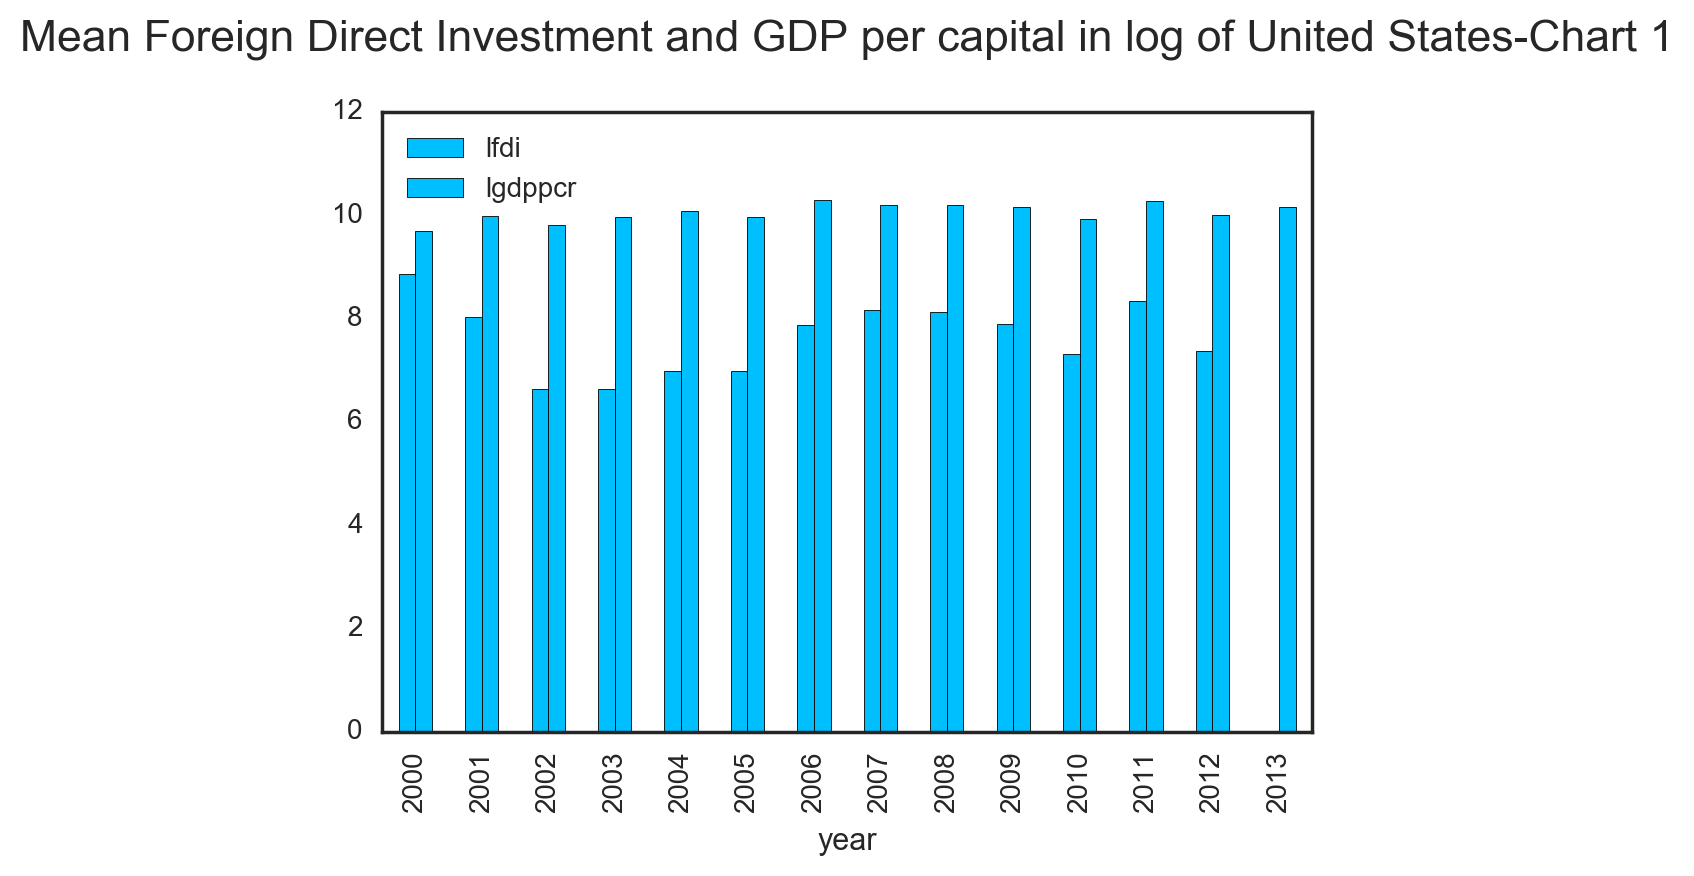

In [440]:
FDIUS.groupby( ['year'] )[ ['lfdi','lgdppcr'] ].mean().plot(kind="bar", color='deepskyblue')
plt.title('Mean Foreign Direct Investment and GDP per capital in log of United States-Chart 1\n', fontsize=16)
plt.show()

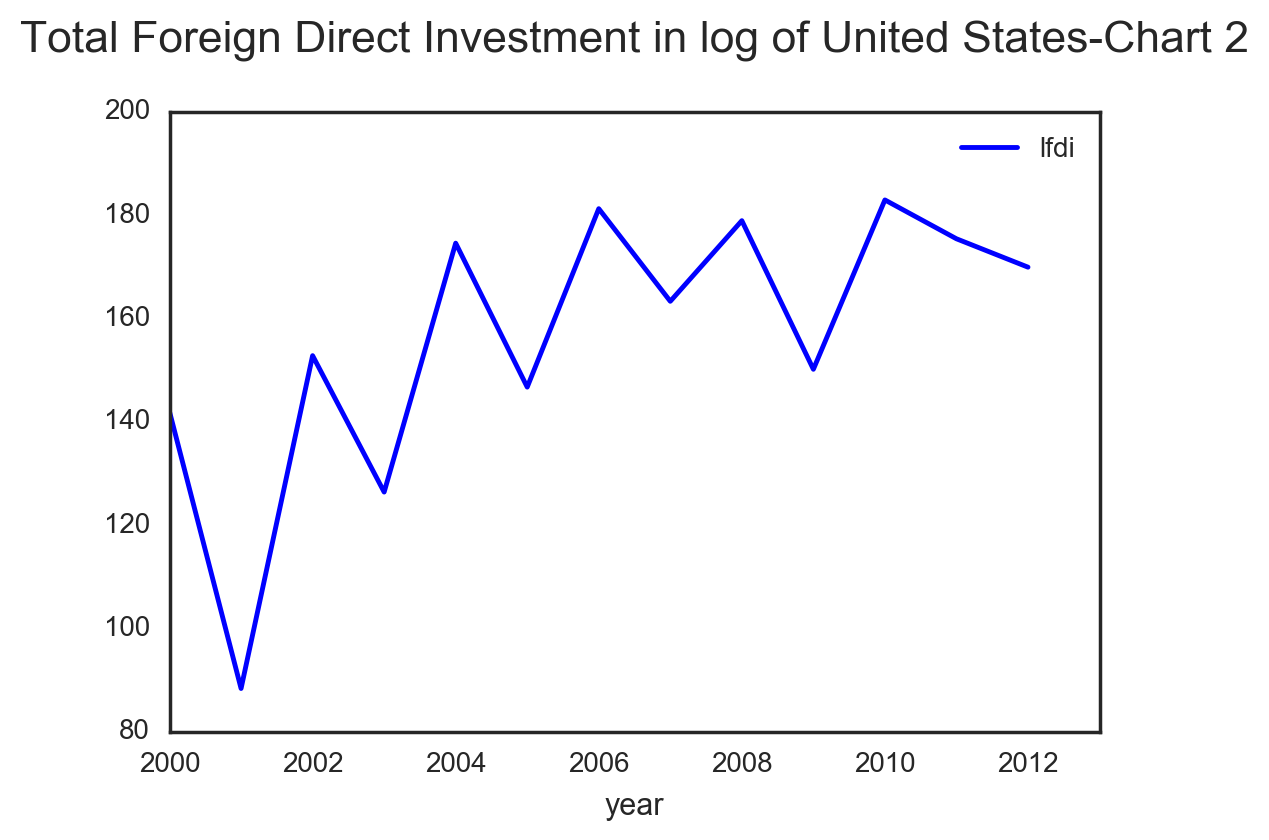

In [441]:
FDIUS.groupby( ['year'] )[ ['lfdi'] ].sum().plot(kind="line", color='b')
plt.title('Total Foreign Direct Investment in log of United States-Chart 2\n', fontsize=16)
plt.show()

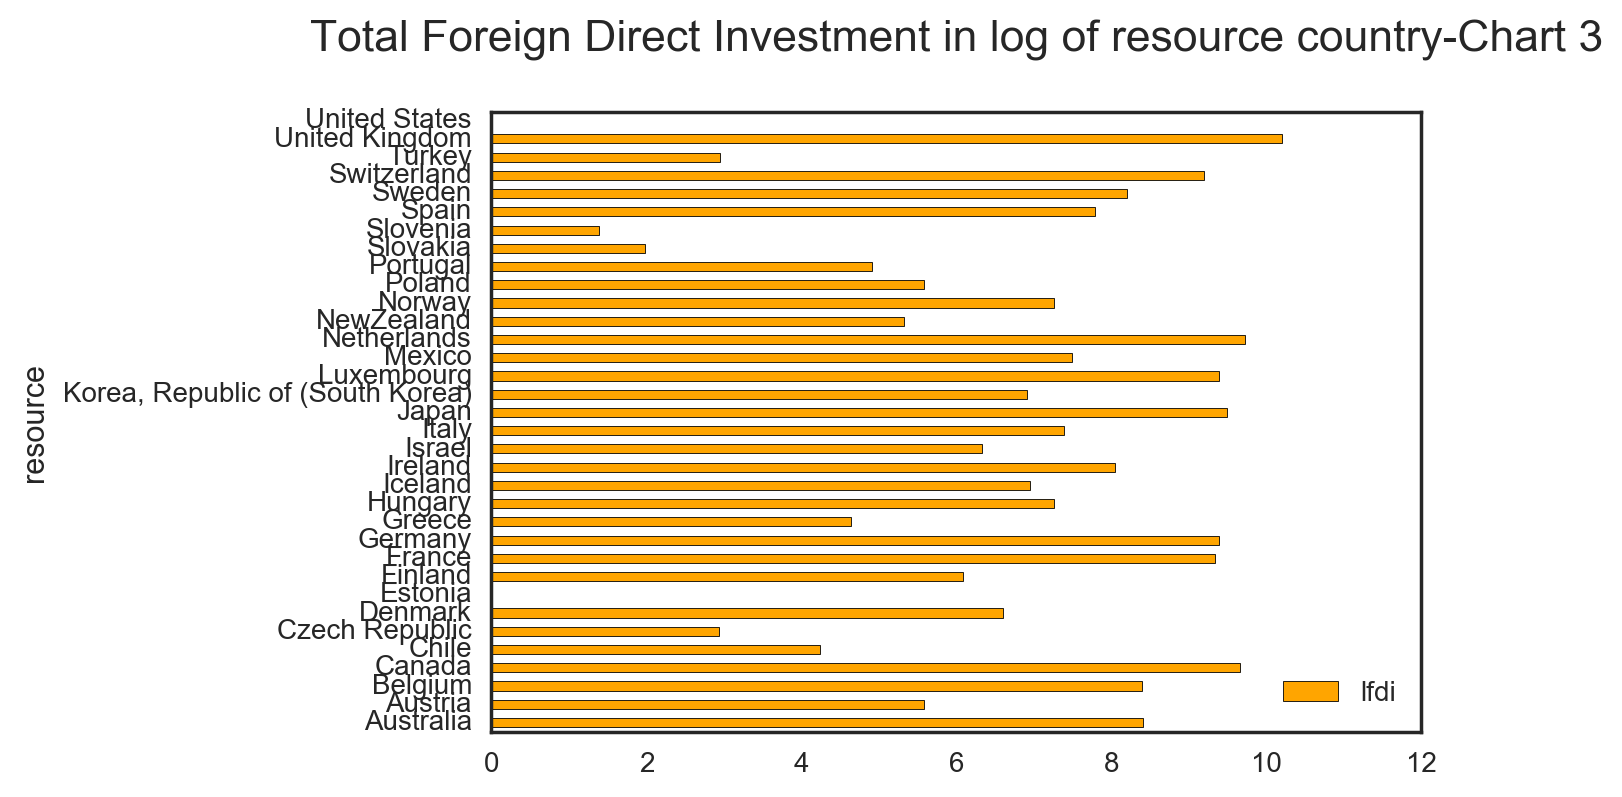

In [442]:
fig = plt.figure(figsize=(20,20))
FDIUS.groupby( ['resource'] )[ ['lfdi'] ].mean().plot(kind="barh", color='orange')
plt.title('Total Foreign Direct Investment in log of resource country-Chart 3\n', fontsize=16)
plt.show()

In [319]:
FDIUS.groupby( ['resource'] )[ ['lfdi'] ].apply(np.mean).add_prefix('Aver_').reset_index()
##rename the average of lfdi to Aver_lfdi

,resource,Aver_lfdi
0,Australia,8.411347
1,Austria,5.584111
2,Belgium,8.395721
3,Canada,9.656726
4,Chile,4.235689
5,Czech Republic,2.942589
6,Denmark,6.599130
7,Estonia,NaN
8,Finland,6.087059
9,France,9.343128


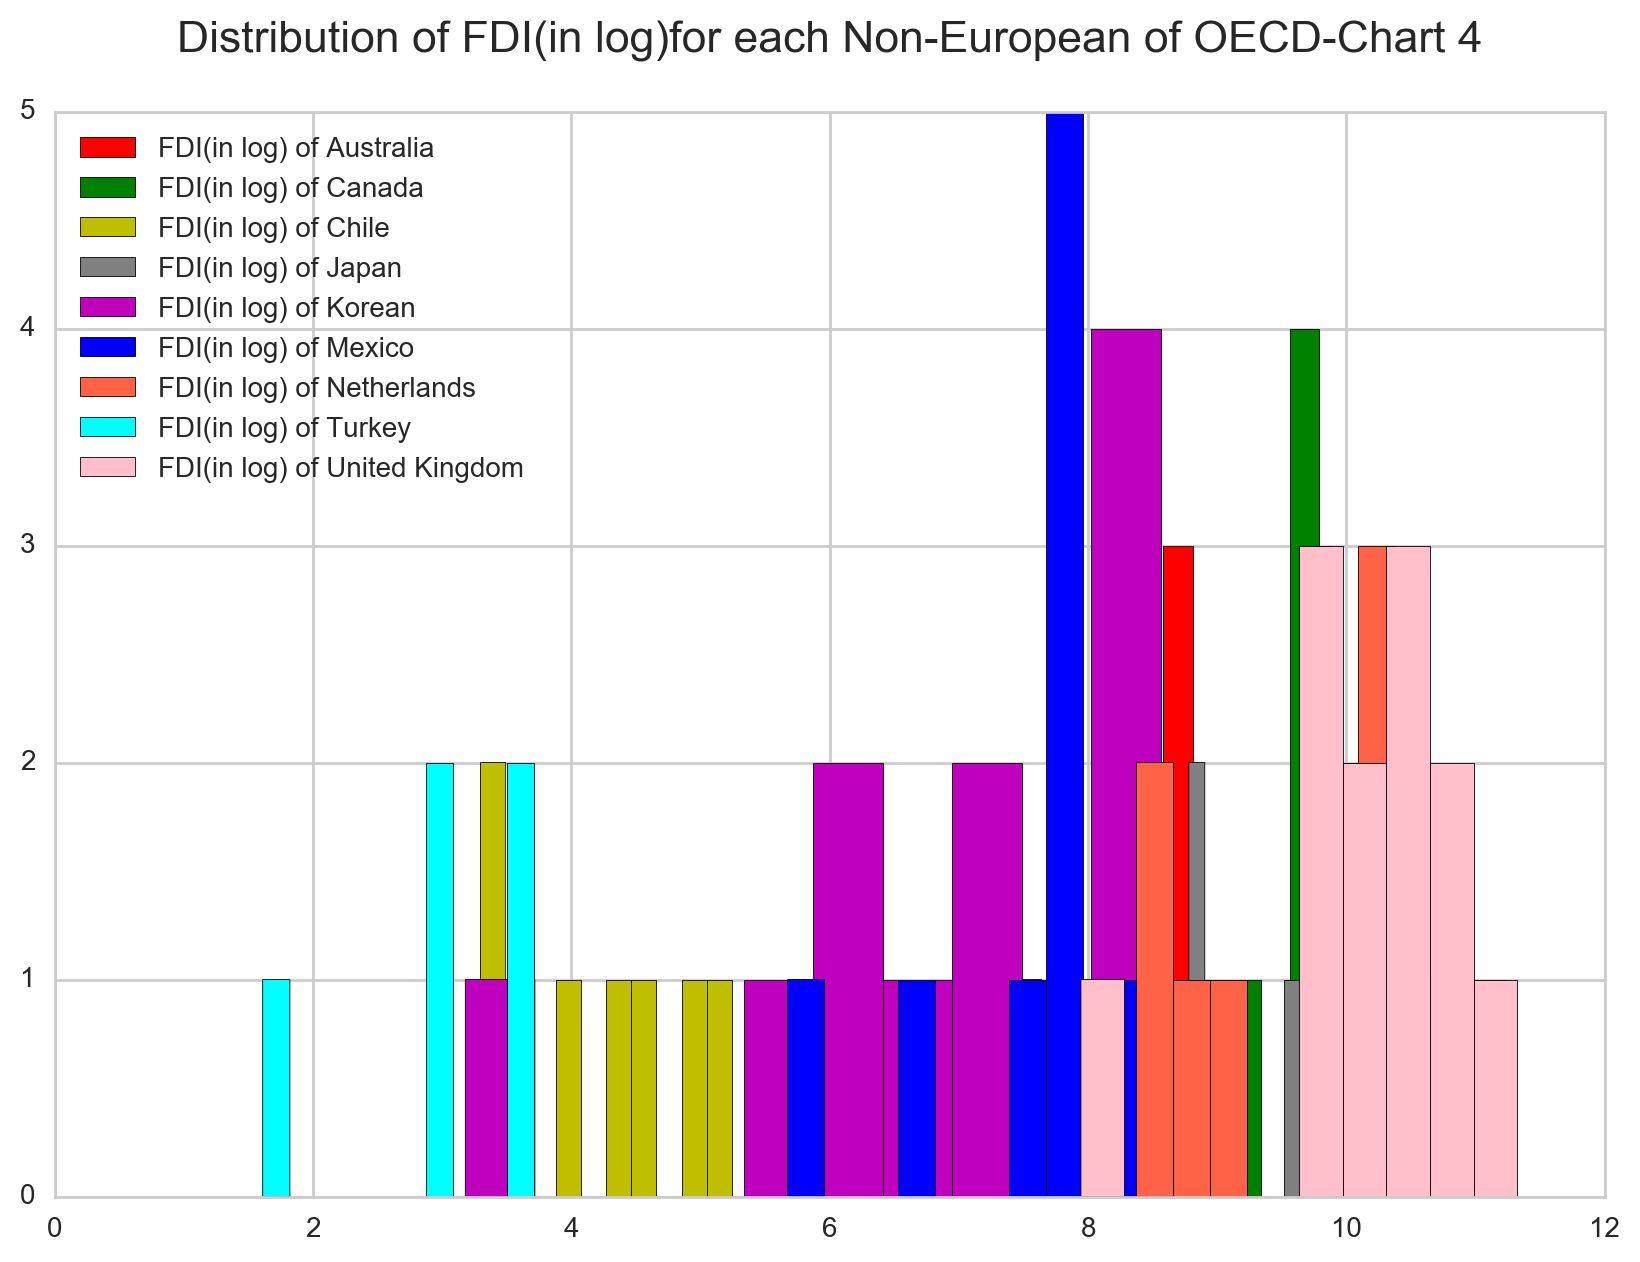

In [357]:
fig = plt.figure(figsize=(10,7))
FDIUS[FDIUS['resource']=='Australia']['lfdi'].hist(color='r', label="FDI(in log) of Australia")
FDIUS[FDIUS['resource']=='Canada']['lfdi'].hist(color='g', label="FDI(in log) of Canada")
FDIUS[FDIUS['resource']=='Chile']['lfdi'].hist(color='y', label="FDI(in log) of Chile")
FDIUS[FDIUS['resource']=='Japan']['lfdi'].hist(color='gray', label="FDI(in log) of Japan")
FDIUS[FDIUS['resource']=='Korea, Republic of (South Korea)']['lfdi'].hist(color='m', label="FDI(in log) of Korean")
FDIUS[FDIUS['resource']=='Mexico']['lfdi'].hist(color='b', label="FDI(in log) of Mexico")
FDIUS[FDIUS['resource']=='Netherlands']['lfdi'].hist(color='tomato', label="FDI(in log) of Netherlands")
FDIUS[FDIUS['resource']=='Turkey']['lfdi'].hist(color='aqua', label="FDI(in log) of Turkey")
FDIUS[FDIUS['resource']=='United Kingdom']['lfdi'].hist(color='pink', label= "FDI(in log) of United Kingdom")
plt.title("Distribution of FDI(in log)for each Non-European of OECD-Chart 4\n", fontsize=16)
plt.legend(loc='upper left')
plt.show()

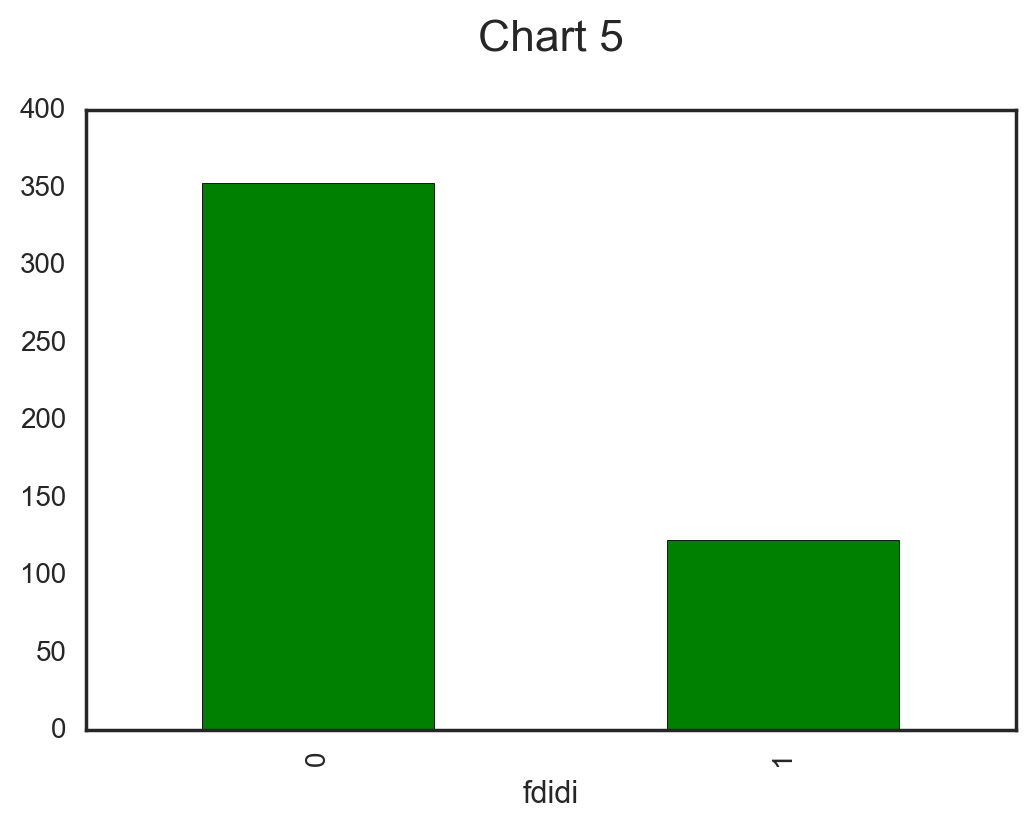

In [451]:
FDIUS.groupby('fdidi').size().plot(kind="bar", color="g", width=0.5)
plt.title("Chart 5\n", fontsize=16)
plt.show()

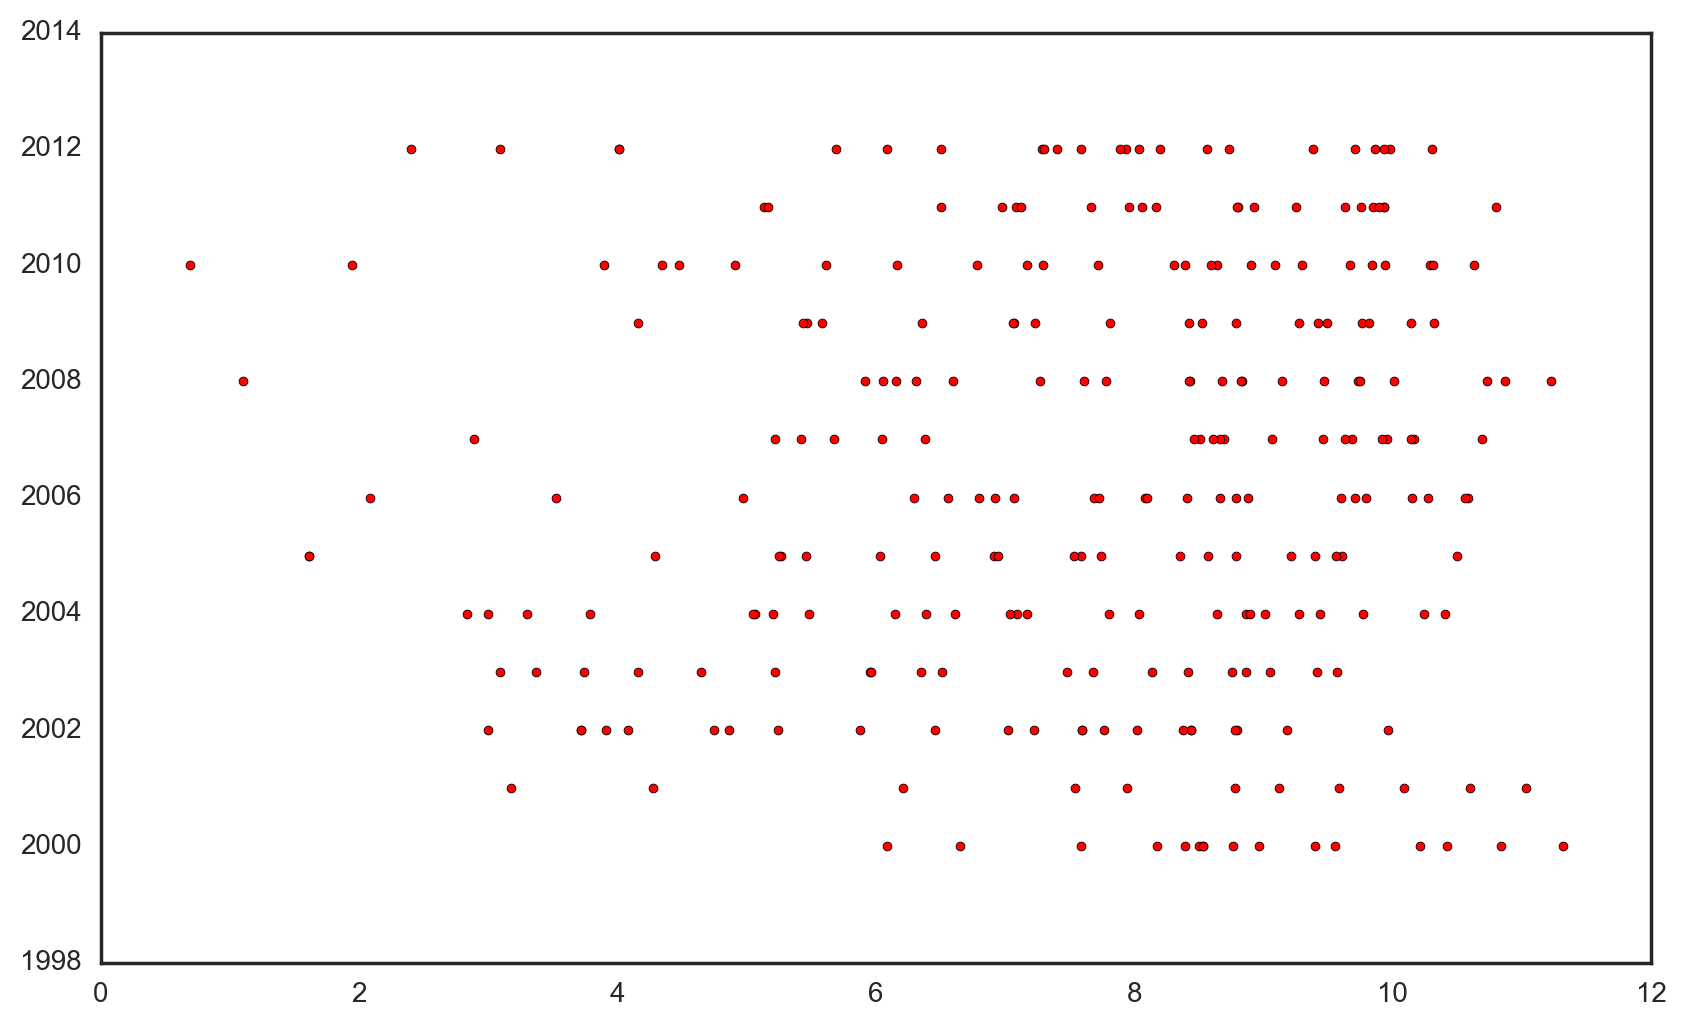

In [386]:
fig=plt.figure(figsize=(10,6))
plt.scatter(FDIUS['lfdi'], FDIUS['year'], s= 10 , c='r', marker='o')

In [453]:
func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std), ('Count', 'count')]
FDIUS_sub_1 = FDIUS.groupby( ['resource','fdidi'] )[ ['lgdppcr', 'lfdi'] ].agg(func_tuples).reset_index()
FDIUS_sub_1

resource fdidi    lgdppcr                      \
                                                 Mean       Var       Std   
0                          Australia     0  10.343646  0.467912  0.684041   
1                            Austria     0  10.256802  0.703561  0.838785   
2                            Belgium     0  10.336008  0.411126  0.641191   
3                             Canada     0  10.185999  1.487177  1.219499   
4                              Chile     0   9.317595  0.798804  0.893758   
5                     Czech Republic     0   9.934554  0.424208  0.651313   
6                            Denmark     0  10.621890  0.001966  0.044337   
7                            Denmark     1  10.620062  0.000032  0.005663   
8                            Estonia     0   9.950333  0.025937  0.161051   
9                            Finland     0  10.264342  0.512281  0.715738   
10                           Finland     1  10.509451  0.005919  0.076937   
11                            France     0  10.202985  0.689636  0.830443   
12                            France     1  10.455942  0.003628  0.060237   
13                           Germany     0   9.999409  1.425210  1.193821   
14                           Germany     1  10.579781  0.002585  0.050848   
15                            Greece     0  10.005322  0.471240  0.686469   
16                            Greece     1   9.102302  1.808645  1.344859   
17                           Hungary     0   9.346028  2.678567  1.636633   
18                           Hungary     1  10.011448  0.001341  0.036617   
19                           Iceland     0   9.670788  2.009609  1.417607   
20                           Ireland     0  10.620201  0.004045  0.063604   
21                           Ireland     1   9.713390  3.226319  1.796196   
22                            Israel     0   9.742989  0.635118  0.796943   
23                            Israel     1  10.293432       NaN       NaN   
24                             Italy     0  10.092808  0.751071  0.866644   
25                             Italy     1  10.496836       NaN       NaN   
26                             Japan     0   9.952441  1.120826  1.058691   
27                             Japan     1  10.414734  0.000979  0.031290   
28  Korea, Republic of (South Korea)     0   9.622295  2.288987  1.512940   
29  Korea, Republic of (South Korea)     1  10.228960  0.026943  0.164143   
30                        Luxembourg     0  10.925896  0.536963  0.732778   
31                        Luxembourg     1  10.758126  0.991339  0.995660   
32                            Mexico     0   9.193949  0.549609  0.741356   
33                            Mexico     1   9.470505  0.011100  0.105354   
34                       Netherlands     0   9.763978  1.616095  1.271257   
35                       Netherlands     1  10.640139  0.003654  0.060452   
36                        NewZealand     0   9.885930  0.931023  0.964895   
37                        NewZealand     1  10.249723  0.008506  0.092226   
38                            Norway     0  10.733595  0.385323  0.620744   
39                            Norway     1  10.808976       NaN       NaN   
40                            Poland     0   9.607826  0.389582  0.624165   
41                            Poland     1   9.669291  0.016090  0.126847   
42                          Portugal     0   9.826078  0.752694  0.867579   
43                          Portugal     1  10.165462       NaN       NaN   
44                          Slovakia     0   9.733237  0.657859  0.811085   
45                          Slovakia     1   8.393296  7.349299  2.710959   
46                          Slovenia     0   9.962217  0.453629  0.673520   
47                          Slovenia     1  10.224430       NaN       NaN   
48                             Spain     0  10.258002  0.004165  0.064537   
49                             Spain     1  10.148126  0.477015  0.690663   
50                      

## Short Report 
This dataset has details Foreign Direct Investment flow of each pair countries of 34 OECDcountries ,over the period 2000-2013.After clean the it and explore the relationships between the variables, here are some interesting things and boring things I found.
1. Without using Statsmodel,it is easy to see the relationships between two variables sometimes. However, when the dataset is complicated,for instance,the dataset sample inclueds thirty-four OECD countries,time series and dummy varibales.Using models can find relationship between variables straightforward. 

2. Creat a subset shows that the average FDI flow (in log) of US and average GDP per capital of recource by year.And from Chart-1,it is obvious that FDI flow of United States is not affected by average GDP per capital of recource countries.

3. As we can see in the Chart-2, the fluctuation of total FDI(in log) flows of US changed year by year.
4. From Chart-3, we can indicate that for the non-Euroean countries, United Kingdom got the highest FDI from United States and Estonia did not gain any FDI from US.

5. Variable 'fdidi'is a dummy variable. If country pairs had FDI 6 years ago, fdidi equals to 1;if not fdidi equals to 0.From the Chart-5, the numbers of fdidi=1 is 3 times as the numbers of fdidi=0.